In [1]:
from collections import Counter
import os

from imutils.object_detection import non_max_suppression
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import numpy as np
import cv2

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/equation'

LR         = 1e-3
BATCH_SIZE = 32


In [3]:
df        = pd.read_csv(f'{DATA_PATH}/Equation_db.csv')
df.head()

,File Name,Equation 1,Equation 2,Value of X,Value of Y
0,IMG_00587,7x + 2y = 56,18x + 14y = 206,6,7
1,IMG_09895,7x - 7y = 70,8x + 5y = 145,15,5
2,IMG_02064,12x + 19y = 88,2x + 9y = 38,1,4
3,IMG_11200,15x - 2y = 4,3x + 3y = 45,2,13
4,IMG_07880,6x + 5y = -11,8x + 10y = -38,4,-7


In [4]:
def imshow(image, label):
    
    plt.imshow(image, cmap = 'gray')
    plt.title(label)
    plt.axis(False)

def get_image_label(row, idx = 1):
    
    image    = cv2.imread(f'{DATA_PATH}/equation1/{row[1]["File Name"]}.png', 0)
    image_cp = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    kernel   = np.ones((3, 3), np.uint8)
    dilated  = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations = 7)
    conts, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    for cont in conts[1:]:
        cv2.drawContours(image_cp, [cont], -1, (0, 255, 0), 1)
        x, y, w, h = cv2.boundingRect(cont)
        cv2.rectangle(image_cp, (x-5, y-5), (x + w + 5, y + h + 5), (255, 0, 0) ,1)
    
    image = image[y - 5 : y + h + 5, x - 5 : x + w + 5]
    return image, row[1][f'Equation {idx}']

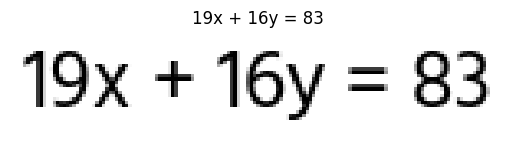

In [5]:
rows         = list(df.iterrows())
image, label = get_image_label(rows[-999])
imshow(image, label)

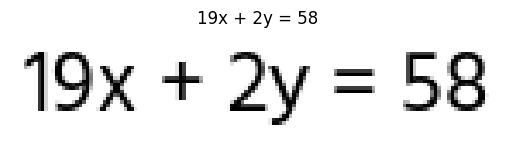

In [6]:
images, labels = [], []
for row in list(df.iterrows()):
    image, label = get_image_label(row)
    
    images.append(image)
    labels.append(label)
    
imshow(images[99], labels[99])